# WeatherPy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build query URL and request response

url = "http://api.openweathermap.org/data/2.5/weather?"
unit ='imperial'

# Set up list to hold data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norilsk
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | areosa
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | magdagachi
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | mayumba
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | kargat
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 2

Processing Record 37 of Set 4 | meyungs
City not found. Skipping...
Processing Record 38 of Set 4 | kepno
Processing Record 39 of Set 4 | santa eulalia
Processing Record 40 of Set 4 | sivas
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | maragogi
Processing Record 44 of Set 4 | celestun
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | kokkola
Processing Record 47 of Set 4 | nuuk
Processing Record 48 of Set 4 | zaysan
Processing Record 49 of Set 4 | capitan bado
Processing Record 0 of Set 5 | jacareacanga
Processing Record 1 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 2 of Set 5 | nyurba
Processing Record 3 of Set 5 | mae chan
Processing Record 4 of Set 5 | half moon bay
Processing Record 5 of Set 5 | mafinga
Processing Record 6 of Set 5 | channel-port aux basques
Processing Record 7 of Set 5 | amarwara
Processing Record 8 of Set 5 | puerto escondido
Processing Record 9 of Set 

Processing Record 28 of Set 8 | sept-iles
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | ukiah
Processing Record 31 of Set 8 | madison heights
Processing Record 32 of Set 8 | nara
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | poquoson
Processing Record 36 of Set 8 | shihezi
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | kamenka
Processing Record 39 of Set 8 | lavumisa
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | cabra
Processing Record 42 of Set 8 | nesbyen
Processing Record 43 of Set 8 | santiago
Processing Record 44 of Set 8 | gangotri
City not found. Skipping...
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | ribeira grande
Processing Record 47 of Set 8 | wajima
Processing Record 48 of Set 8 | tomatlan
Processing Record 49 of Set 8 | ginir
Processing Record 0 of Set 9 | paoua
Processin

Processing Record 18 of Set 12 | kandrian
Processing Record 19 of Set 12 | atbasar
Processing Record 20 of Set 12 | ballybofey
Processing Record 21 of Set 12 | nelson bay
Processing Record 22 of Set 12 | san felipe
Processing Record 23 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 24 of Set 12 | te anau
Processing Record 25 of Set 12 | reforma
Processing Record 26 of Set 12 | jequie
Processing Record 27 of Set 12 | narasannapeta
Processing Record 28 of Set 12 | ahipara
Processing Record 29 of Set 12 | asyut
Processing Record 30 of Set 12 | olavarria
Processing Record 31 of Set 12 | semporna
Processing Record 32 of Set 12 | awjilah
Processing Record 33 of Set 12 | kondinskoye
Processing Record 34 of Set 12 | ziyamet
City not found. Skipping...
Processing Record 35 of Set 12 | benjamin constant
Processing Record 36 of Set 12 | kloulklubed
Processing Record 37 of Set 12 | desna
Processing Record 38 of Set 12 | maumere
Processing Record 39 of Set 12 | makakilo cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Convert array of JSONs into Pandas DataFrame
city_df = pd.DataFrame(city_data)
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.173991,17.701810,60.582583,69.148342,54.862129,7.819878,1.651286e+09
std,33.320670,89.243953,19.633818,21.008007,40.069653,5.662979,1.008665e+02
min,-54.800000,-175.200000,0.640000,1.000000,0.000000,0.000000,1.651285e+09
25%,-7.747900,-59.516700,45.730000,59.000000,13.000000,3.710000,1.651286e+09
50%,26.184200,21.850000,62.960000,74.000000,62.000000,6.380000,1.651286e+09
75%,47.570200,92.750000,76.840000,84.000000,99.000000,10.360000,1.651286e+09
max,78.218600,179.316700,98.740000,100.000000,100.000000,29.930000,1.651286e+09


In [33]:
# Export to .csv file
city_df.to_csv("Output/City_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#Find cities with 100% humidity, zero city found
#Get the indices of cities that have humidity over 100%.
humid_city= city_df[(city_df["Humidity"] > 100)].index                                 
humid_city

Int64Index([], dtype='int64')

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(humid_city, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norilsk,69.3535,88.2027,15.42,78,57,5.73,RU,1651285707
1,punta arenas,-53.1500,-70.9167,30.31,93,0,5.75,CL,1651285696
2,avarua,-21.2078,-159.7750,82.45,78,95,17.27,CK,1651285708
3,hobart,-42.8794,147.3294,60.66,55,75,14.97,AU,1651285709
4,areosa,41.7178,-8.8571,58.30,71,19,3.89,PT,1651285709


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is looking at the relationship between latitude and temperature. It shows that as you aprroach the equator (latitude 0) the temperature gets hotter.

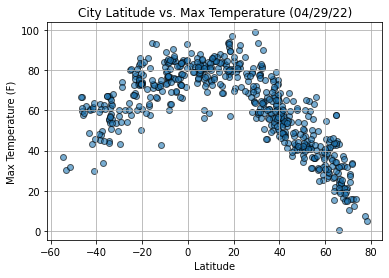

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], linewidths=1, marker="o",
            alpha=.6, edgecolor='black')

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig1_Lat_vs_Temp.png")

plt.show()

## Latitude vs. Humidity Plot
This plot is looking at the relationship between latitude and humidity. It shows that there is not much of a correlation between latitude and humidity.

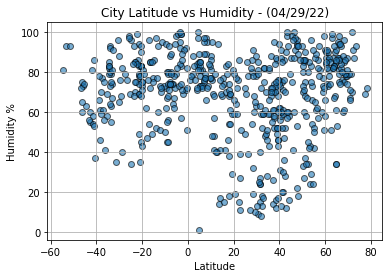

In [85]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], 
            alpha=.6, edgecolor='black')

plt.title(f"City Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.grid()
plt.savefig("Output/Fig2_Lat_vs_Hum.png")

plt.show()

## Latitude vs. Cloudiness Plot
This plot is looking at the relationship between latitude and cloudiness. This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

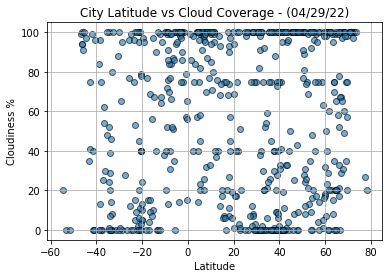

In [86]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], 
            alpha=.6, edgecolor='black')

plt.title(f"City Latitude vs Cloud Coverage - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.grid()
plt.savefig("Output/Fig3_Lat_vs_Cloud.png")

plt.show()

## Latitude vs. Wind Speed Plot
This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

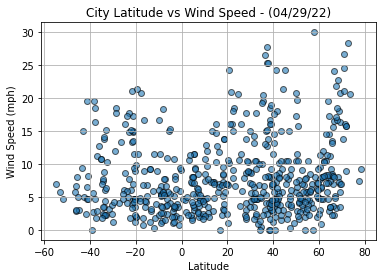

In [50]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], 
            alpha=.6, edgecolor='black')

plt.title(f"City Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig("Output/Fig4_Lat_vs_Wind.png")


## Linear Regression

In [62]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (clean_city_data.loc[clean_city_data['Lat'] > 0])
southern_df = (clean_city_data.loc[clean_city_data['Lat'] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.7870423204460519


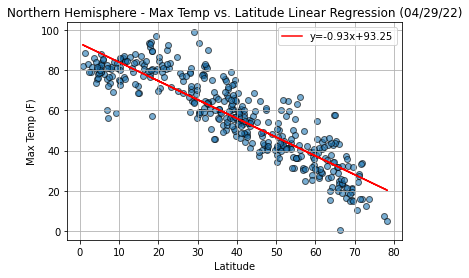

In [70]:
# Linear regression on Northern Hemisphere
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Max Temp'].astype(float), 
             "Latitude",
             "Max Temp (F)", 
             f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", 
             "Output/Fig5_NH_Lat_vs_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.516399340722392


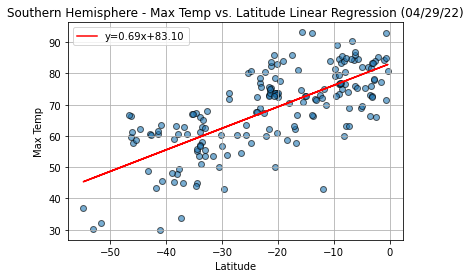

In [72]:
# Linear regression on Southern Hemisphere
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Max Temp'].astype(float), 
             "Latitude",
             "Max Temp", 
             f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig6_SH_Lat_vs_Temp")

Analysis: 

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.01949539014272443


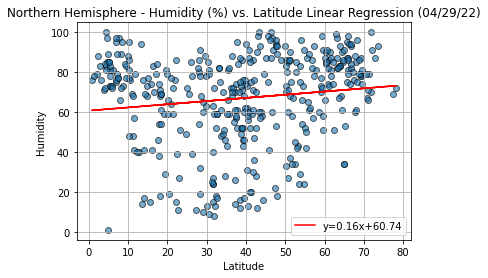

In [73]:
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Humidity'].astype(float), 
             "Latitude",
             "Humidity", 
             f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig7_NH_Lat_vs_Hum")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.033081111562396265


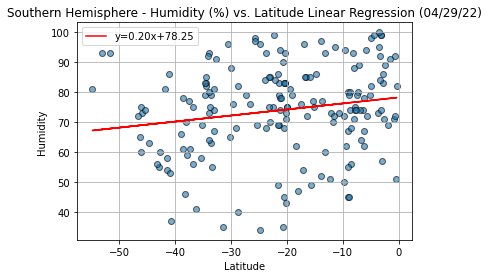

In [75]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Humidity'].astype(float), 
             "Latitude",
             "Humidity", 
             f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig8_SH_Lat_vs_Hum")

Analysis: 

There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.0013579167587367044


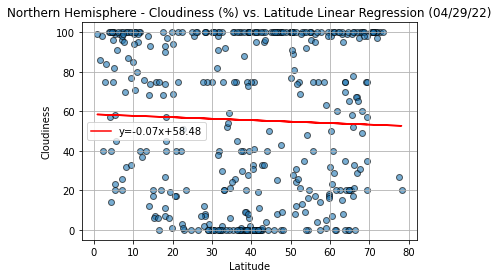

In [76]:
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Cloudiness'].astype(float), 
             "Latitude",
             "Cloudiness", 
             f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig9_NH_Lat_vs_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.0755580564435047


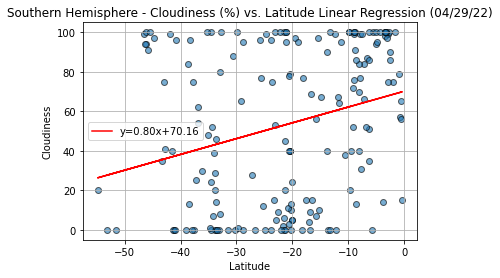

In [78]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Cloudiness'].astype(float), 
             "Latitude",
             "Cloudiness", 
             f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig10_SH_Lat_vs_Cloud")

Analysis:
    
There does not seem to be much correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight negative correlation in the Northern Hemisphere but a strong positive correlation in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.03145782942854865


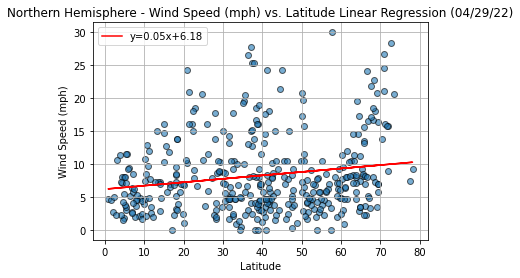

In [79]:
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Wind Speed'].astype(float), 
             "Latitude",
             "Wind Speed (mph)", 
             f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig11_NH_Lat_vs_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.01751859437950297


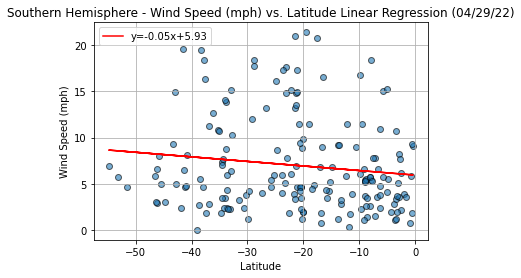

In [80]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Wind Speed'].astype(float), 
             "Latitude",
             "Wind Speed (mph)", 
             f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Output/Fig12_SH_Lat_vs_Wind")

Analysis:

There is a correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are.